In [2]:
#importing Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn import linear_model


In [3]:
# Question 1: importing  Data
df = pd.read_csv("./Dataset.csv")

In [4]:
df
# we have two columns sqft and property price

,Sqft,propertyprice
0,2500,800000
1,3500,1000000
2,3800,1500000
3,4500,2000000
4,5000,2500000


In [5]:
df.describe()

,Sqft,propertyprice
count,5.00000,5.000000e+00
mean,3860.00000,1.560000e+06
std,960.72889,7.021396e+05
min,2500.00000,8.000000e+05
25%,3500.00000,1.000000e+06
50%,3800.00000,1.500000e+06
75%,4500.00000,2.000000e+06
max,5000.00000,2.500000e+06


In [10]:
# Check for the missing and null values
df.isna().sum()

Sqft             0
propertyprice    0
dtype: int64

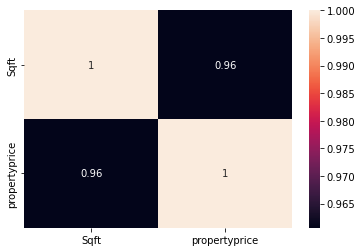

In [11]:
#Corelation with the heatmap 
sns.heatmap(df.corr(),annot = True)
plt.show()

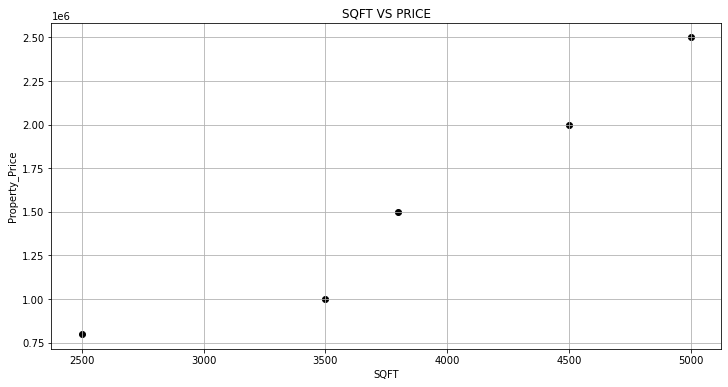

In [27]:
#Question 2: Scatterplot
plt.figure(figsize=(12,6))
plt.scatter(df['Sqft'],df['propertyprice'],color = 'black')
plt.title('SQFT VS PRICE')
plt.xlabel('SQFT')
plt.ylabel('Property_Price')
plt.grid(True)
plt.show()

In [16]:
n_df = df.drop('propertyprice', axis = 'columns' )

In [17]:
n_df

,Sqft
0,2500
1,3500
2,3800
3,4500
4,5000


In [18]:
#Sales = Target
target = df['propertyprice']

In [19]:
target

0     800000
1    1000000
2    1500000
3    2000000
4    2500000
Name: propertyprice, dtype: int64

In [20]:
# Question 3: Creating linear regression model 
lr = linear_model.LinearRegression()

In [22]:
# Question 4: Training Data set
lr.fit(n_df,target)

LinearRegression()

In [24]:
#Question 5: Predict price for given 3200 sqft value.
lr.predict([[3200]])

array([1096641.38678223])

In [25]:
#Generate model prediction for given sqft area
y_predict = lr.predict(n_df)

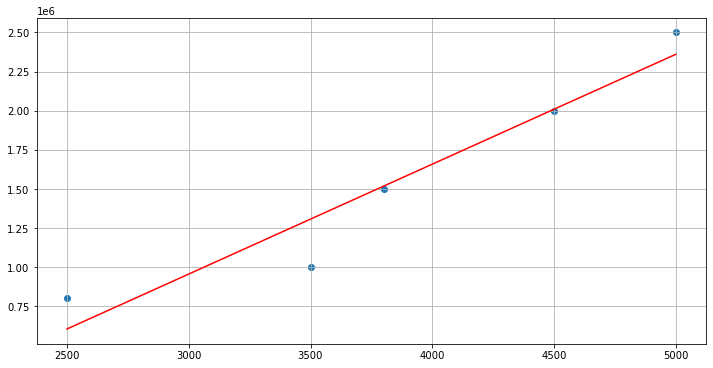

In [29]:
# Visualize the predicte amount 
plt.figure(figsize=(12,6))
plt.scatter(df['Sqft'],df['propertyprice'])
plt.plot(df['Sqft'],y_predict,'r')
plt.grid(True)
plt.show()

In [30]:
#Intercept value
print('Intercept:',lr.intercept_)

Intercept: -1149945.8288190686


In [31]:
#SLope Value
print('Slope:',lr.coef_)

Slope: [702.05850488]


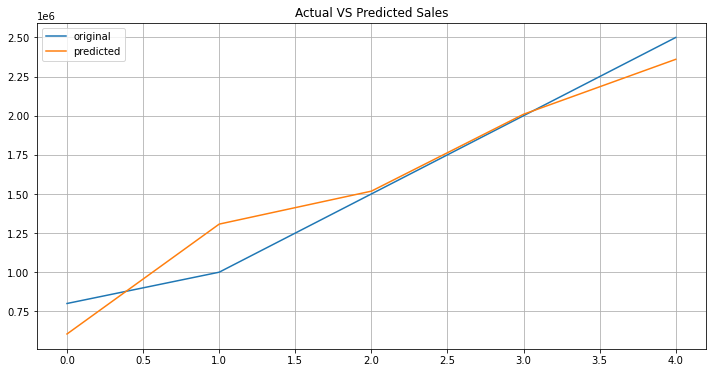

In [32]:
plt.figure(figsize=(12,6))
x_ax = range(len(df['propertyprice']))
plt.plot(x_ax,df['propertyprice'],label ='original')
plt.plot(x_ax,y_predict,label='predicted')
plt.title("Actual VS Predicted Sales")
plt.legend()
plt.grid()
plt.show()

### Conclusion from the assignment

####  There were no missing and null values in our dataset
####  Property price seems to be linearly dependent to the square foot i.e as the square foot increases the property price is increases too.
####  Based on trained Linear Model, if the house size is 3200 sqft then the house price will be approximate of 1096641.